## Observations and Insights 

In [ ]:
#insight 1: Capomulin and Ramicane have the lowest average tumor size, so could assume they are the more successful drugs

#insight 2: While we found out that gender was almost even between male and female mice, we didn't calculate what this means in regards to the effectiveness on the drugs depending on gender. We would need to dive into if male or female mice had smaller tumors on average from a certain drug

#insight 3: For mice treated with Capomulin, the fatter they were, the less effective the treatment was. Could mean they need an increased dose in comparison to their skinnier mice friends.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
                                
# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_number = combined_df["Mouse ID"].nunique()
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[(combined_df["Mouse ID"] != "g989")]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_number_clean = clean_df["Mouse ID"].nunique()
mice_number_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

statistics_df = pd.DataFrame({"Mean": mean,
                            "Median": median,
                            "Variance": variance,
                            "Standard Deviation": standard,
                            "SEM": sem})
statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

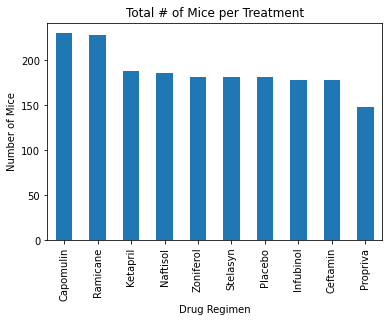

In [28]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bar_plot = clean_df["Drug Regimen"].value_counts().plot(kind = "bar")

#labels
plt.title("Total # of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()


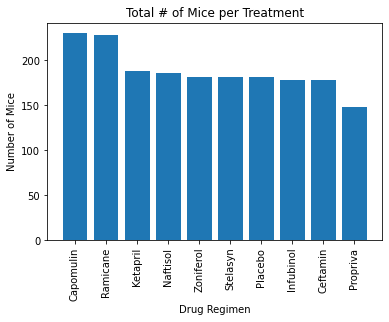

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

y_axis = clean_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(y_axis))

plt.bar(x_axis, y_axis)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values)

#labels
plt.title("Total # of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation = 90)

plt.show()

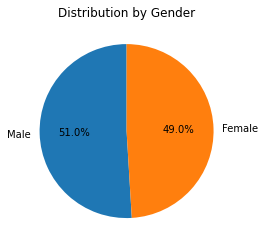

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#find count of male and females
gender_count = clean_df["Sex"].value_counts()

#create pie plot
pie_plot = gender_count.plot.pie(autopct = "%1.1f%%", startangle = 90, ylabel = (""), title = "Distribution by Gender")

plt.show()

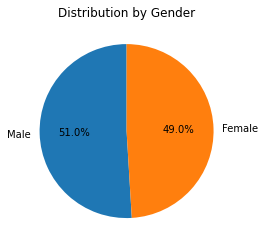

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#find count of male and females
gender_count = clean_df["Sex"].value_counts()

#create pie plot
plt.pie(gender_count, labels = gender_count.index.values, autopct = "%1.1f%%", startangle = 90)
plt.title("Distribution by Gender")
        
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time_df = pd.DataFrame(clean_df.groupby("Mouse ID")["Timepoint"].max())
#max_time_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_time_df = pd.merge(max_time_df, clean_df, on = ["Mouse ID", "Timepoint"], how = "inner")
merge_time_df = merge_time_df.rename(columns = {"Timepoint": "Max Timepoint"})
                                                      
merge_time_df.head()


,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = merge_time_df.loc[merge_time_df["Drug Regimen"] == treatment]
    
    # add subset 
    volume_df = treatment_df.loc[treatment_df["Max Timepoint"] == treatment_df["Max Timepoint"]]
    
    #append to tumor list
    final_volume = volume_df["Tumor Volume (mm3)"]
    tumor_volume.append(final_volume)
    
    #find IQR for each drug
    quartiles = final_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"IQR for {treatment}: {iqr}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Lower Bound for {treatment}: {lower_bound}")
    print(f"Upper Bound for {treatment}: {upper_bound}")
    
    outliers = (final_volume.loc[(merge_time_df["Tumor Volume (mm3)"] >= upper_bound) |
                                 (merge_time_df["Tumor Volume (mm3)"] <+ lower_bound)]).count()
    print(f"Potential outliers in {treatment}: {outliers}")
    print()

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Potential outliers in Capomulin: 0

IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Potential outliers in Ramicane: 0

IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Potential outliers in Infubinol: 1

IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Potential outliers in Ceftamin: 0



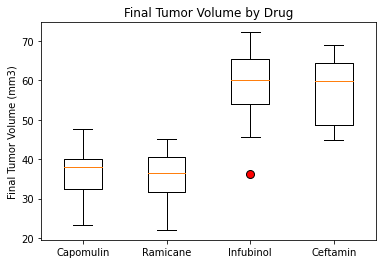

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops = dict(marker = "o", markerfacecolor = "red", markersize = 8, markeredgecolor = "black")

plt.boxplot(tumor_volume, flierprops = flierprops)

#labels
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], treatments)

plt.show()

## Line and Scatter Plots

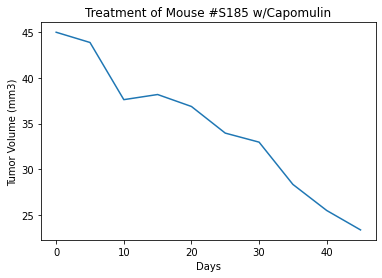

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#mouse number s185
#get specific mouse info
one_mouse = clean_df.loc[clean_df["Mouse ID"] == "s185"]

#one_mouse

#create line plot
x_axis = one_mouse["Timepoint"]
y_axis = one_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)

#labels
plt.title("Treatment of Mouse #S185 w/Capomulin")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


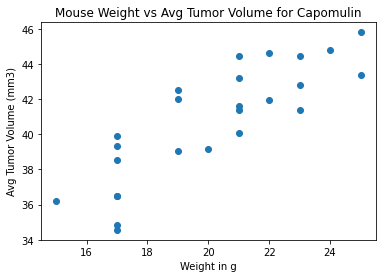

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#find only capomulin data
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
#cap_df 

#find average tumor volume
cap_tumor_volume = pd.DataFrame(cap_df.groupby("Mouse ID") ["Tumor Volume (mm3)"].mean())
cap_tumor_volume = cap_tumor_volume.rename(columns = {"Tumor Volume (mm3)" : "Avg Tumor Volume (mm3)"})
#cap_tumor_volume

#find weight
cap_mouse_weight = cap_df[["Mouse ID", "Weight (g)"]]
#cap_mouse_weight

#merge data frames
merged_cap_data = pd.merge(cap_tumor_volume, cap_mouse_weight, on = "Mouse ID", how = "inner")
#merged_cap_data

#drop duplicates
final_merged_cap_data = merged_cap_data[["Mouse ID", "Weight (g)", "Avg Tumor Volume (mm3)"]].drop_duplicates()
#final_merged_cap_data

#set axis
x_axis = final_merged_cap_data["Weight (g)"]
y_axis = final_merged_cap_data["Avg Tumor Volume (mm3)"]

#create plot
plt.scatter(x_axis, y_axis)

#labels
plt.title("Mouse Weight vs Avg Tumor Volume for Capomulin")
plt.xlabel("Weight in g")
plt.ylabel("Avg Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

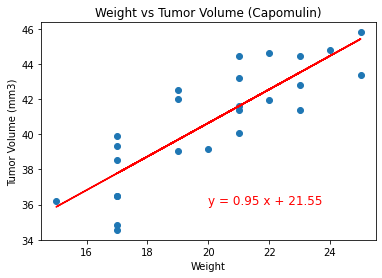

Correlation is 0.84


In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr) = linregress(final_merged_cap_data["Weight (g)"], final_merged_cap_data["Avg Tumor Volume (mm3)"])
regress_values = final_merged_cap_data["Weight (g)"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(final_merged_cap_data["Weight (g)"], final_merged_cap_data["Avg Tumor Volume (mm3)"])
plt.plot(final_merged_cap_data["Weight (g)"], regress_values, color = "red")
plt.annotate(line_eq, (20,36), color = "red", fontsize = 12)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume (Capomulin)")
plt.show()

print(f"Correlation is {round(rvalue, 2)}")